<a href="https://colab.research.google.com/github/thynash/Yuri-Night/blob/main/ORION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Yuri's Night**

We would start our EDA journey by first importing our libaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import plotly.express as px

#sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE

Now we would load our dataset with the help of pandas library  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/transformed_data (1).csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-2abdb942f962>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/transformed_data (1).csv")


below are the first firve records of the dataset

In [ ]:
df.head()

,index,id,spkid,full_name,pdes,name,prefix,neo,pha,H,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,323650,a0323651,2323651,323651 (2005 BR20),323651,0,0,N,N,18.2,...,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,MBA,0.73452
1,571724,bK04C47Q,3242421,(2004 CQ47),2004 CQ47,0,0,N,N,17.7,...,0.000006,0.000062,0.000075,0.000047,5.644400e-08,6.310600e-09,0.000198,0.000040,MBA,0.59010
2,395983,a0395984,2395984,395984 (2013 BV32),395984,0,0,N,N,17.4,...,0.000009,0.000113,0.000119,0.000041,5.827700e-08,6.375200e-09,0.000191,0.000047,MBA,0.47752
3,235862,a0235863,2235863,235863 (2005 AY53),235863,0,0,N,N,15.1,...,0.000006,0.000034,0.000041,0.000029,5.184000e-08,3.813600e-09,0.000174,0.000043,MBA,0.56332
4,651830,bK09B35Q,3445579,(2009 BQ35),2009 BQ35,0,0,N,N,17.3,...,0.000009,0.000081,0.000114,0.000069,5.354400e-08,5.324700e-09,0.000334,0.000041,MBA,0.61287


The structure of the dataset is as follows :

*   1 lakh records
*   46 attributes




In [ ]:
df.shape

(100000, 46)

Column wise information is given below out of the 46 attributes ⁉

*   32 have float datatype
*   10 have object/string datatype
*   4 have integer datatype





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           100000 non-null  int64  
 1   id              100000 non-null  object 
 2   spkid           100000 non-null  int64  
 3   full_name       100000 non-null  object 
 4   pdes            100000 non-null  object 
 5   name            100000 non-null  object 
 6   prefix          100000 non-null  object 
 7   neo             100000 non-null  object 
 8   pha             100000 non-null  object 
 9   H               100000 non-null  float64
 10  diameter        100000 non-null  float64
 11  albedo          100000 non-null  float64
 12  diameter_sigma  100000 non-null  float64
 13  orbit_id        100000 non-null  object 
 14  epoch           100000 non-null  float64
 15  epoch_mjd       100000 non-null  int64  
 16  epoch_cal       100000 non-null  int64  
 17  equinox    

Now lets select 3 features for further analysis

*   List item
*   List item



In [ ]:
df_mini=df.loc[:,["H","diameter","sigma_ad"]]

In [ ]:
df_mini.head()

,H,diameter,sigma_ad
0,18.2,0.000,1.785700e-08
1,17.7,0.000,5.644400e-08
2,17.4,0.000,5.827700e-08
3,15.1,6.539,5.184000e-08
4,17.3,0.000,5.354400e-08


Here is the mean meadian and standard deviation for the features

In [ ]:
df_mini.agg(["mean","std","median"])

,H,diameter,sigma_ad
mean,16.787045,0.775601,1.158237e+01
std,2.262636,3.541604,1.395805e+03
median,16.900000,0.000000,4.219400e-08


Since we would be using SVM algorithm later so for the same reason we would be normalizing the dataset as SVM is sensitive to the data, therefore Z- Score Normalization is necessary:

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns #selects only the columns with int and float data types
scaler = StandardScaler() #used for standard scaling (Z score)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

the normalized dataset is shown below

In [ ]:
df.head()

,index,id,spkid,full_name,pdes,name,prefix,neo,pha,H,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,-0.559463,a0323651,-0.217834,323651 (2005 BR20),323651,0,0,N,N,0.624476,...,-0.009704,-0.009897,-0.00653,-0.006529,-0.008298,-0.032797,-0.006553,-0.008677,MBA,1.671009
1,0.335462,bK04C47Q,-0.083979,(2004 CQ47),2004 CQ47,0,0,N,N,0.403494,...,-0.009704,-0.009898,-0.00653,-0.006529,-0.008298,-0.032797,-0.006553,-0.008677,MBA,0.299171
2,-0.298522,a0395984,-0.207296,395984 (2013 BV32),395984,0,0,N,N,0.270904,...,-0.009704,-0.009898,-0.00653,-0.006529,-0.008298,-0.032797,-0.006553,-0.008677,MBA,-0.770221
3,-0.876158,a0235863,-0.230624,235863 (2005 AY53),235863,0,0,N,N,-0.745614,...,-0.009704,-0.009898,-0.00653,-0.006529,-0.008298,-0.032797,-0.006553,-0.008677,MBA,0.044789
4,0.624444,bK09B35Q,-0.054381,(2009 BQ35),2009 BQ35,0,0,N,N,0.226708,...,-0.009704,-0.009898,-0.00653,-0.006529,-0.008298,-0.032797,-0.006553,-0.008677,MBA,0.515462


<ipython-input-18-a3644bf707dc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['neo'], palette="coolwarm")
<ipython-input-18-a3644bf707dc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pha'], palette="coolwarm")


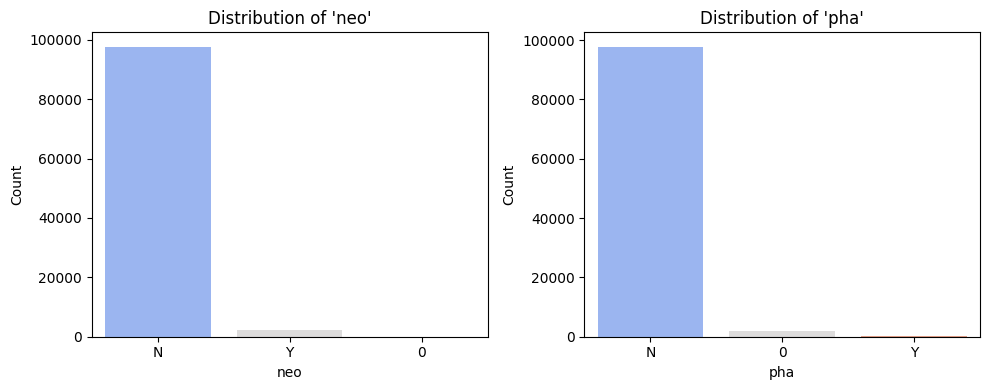

Value Counts for 'neo':
 neo
N    0.97615
Y    0.02384
0    0.00001
Name: proportion, dtype: float64

Value Counts for 'pha':
 pha
N    0.97716
0    0.02062
Y    0.00222
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'neo' and 'pha'
plt.figure(figsize=(10, 4))

# Plot for 'neo'
plt.subplot(1, 2, 1)
sns.countplot(x=df['neo'], palette="coolwarm")
plt.title("Distribution of 'neo'")
plt.xlabel("neo")
plt.ylabel("Count")

# Plot for 'pha'
plt.subplot(1, 2, 2)
sns.countplot(x=df['pha'], palette="coolwarm")
plt.title("Distribution of 'pha'")
plt.xlabel("pha")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Display value counts for better understanding
print("Value Counts for 'neo':\n", df['neo'].value_counts(normalize=True))
print("\nValue Counts for 'pha':\n", df['pha'].value_counts(normalize=True))


The inferences based on the above statistics is as follows :

*   The dataset is highly imabalanced in terms of number of records
*   The dataset is highly varrying in terms of records which can be seen from the high standard deviation
*   Median shows that data is highly skewed





According to NASA JPL data


*   NEO(Near Earth Objects ) : are those with q(perhillion distance) less than 1.3 au


*   PHA(Potentially Hazardous Asteroid) : are those NEA(Near Earth Asteriods ) which have MOID( Minimum Orbit Intersection Distance ) less than 0.05 au and whose absolute magnitude is less 22


* NHA(Non Hazardous Asteriods) : whichever asteriods do not follow the above criteria are non hazardous asteriods.

therefore now we would be classifying the dataset in terms of these criteria's


In [ ]:
# Initialize all as NHA (Non-Hazardous Asteroids)
df["Asteroid_Type"] = 2

# Assign 0 to NEOs (Near-Earth Objects)
df.loc[df["q"] < 1.3, "Asteroid_Type"] = 0

# Assign 1 to PHAs (Potentially Hazardous Asteroids) within NEOs
df.loc[(df["q"] < 1.3) & (df["moid"] <= 0.05) & (df["H"] <= 22.0), "Asteroid_Type"] = 1


Now that we have classified the data we would be making the heat map of this with respect to the years and check the efficiency of this classifying method

In [ ]:
df.Asteroid_Type.value_counts()

,count
Asteroid_Type,
2,97616
0,2163
1,221


From this we can see that the database is severly imbalanced

Now let us seperate the year column from the full_name attribute

In [ ]:
import re
# Extract year from 'full_name' using regex
df["year"] = df["full_name"].apply(lambda x: int(re.search(r'\b(19\d{2}|20\d{2})\b', str(x)).group(0)) if re.search(r'\b(19\d{2}|20\d{2})\b', str(x)) else None)

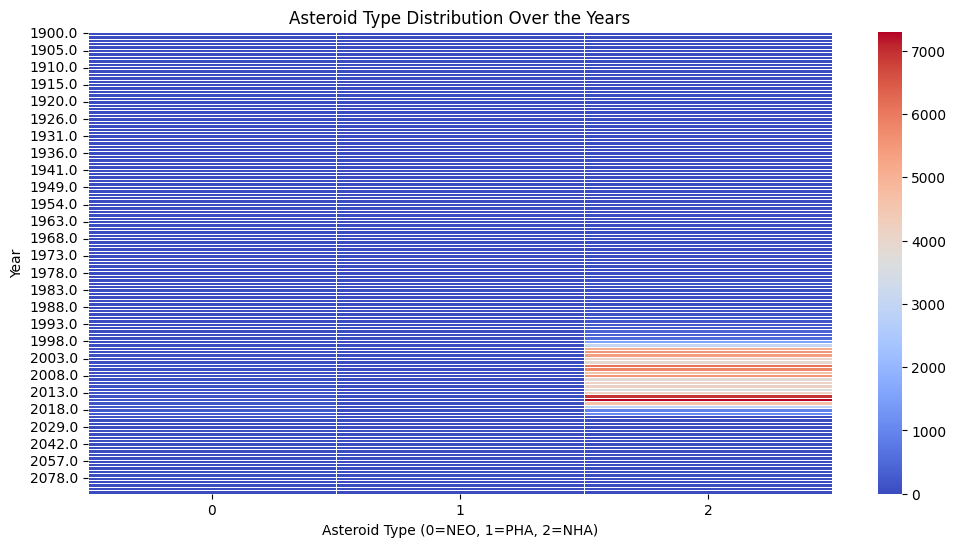

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for heatmap
pivot_table = df.pivot_table(index="year", columns="Asteroid_Type", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)
plt.title("Asteroid Type Distribution Over the Years")
plt.xlabel("Asteroid Type (0=NEO, 1=PHA, 2=NHA)")
plt.ylabel("Year")
plt.show()


IQR - H: 1.700, Diameter: 0.000, Albedo: 0.000
Skewness - H: -2.444, Diameter: 22.371, Albedo: 4.711


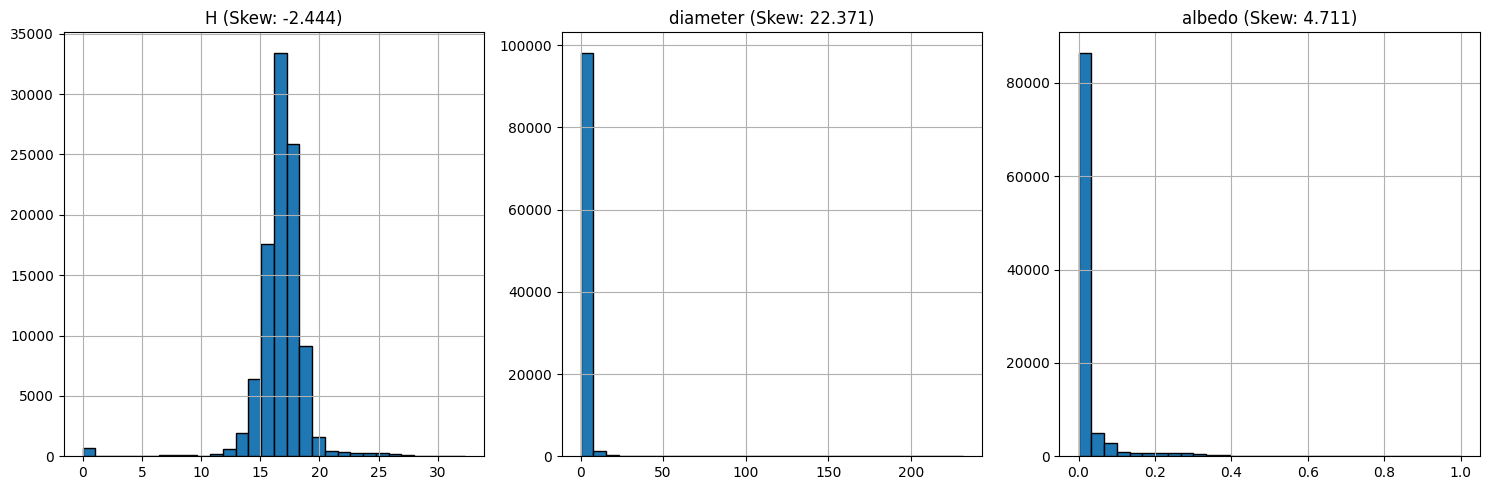

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate IQR
iqr_H = df["H"].quantile(0.75) - df["H"].quantile(0.25)
iqr_diameter = df["diameter"].quantile(0.75) - df["diameter"].quantile(0.25)
iqr_albedo = df["albedo"].quantile(0.75) - df["albedo"].quantile(0.25)

print(f"IQR - H: {iqr_H:.3f}, Diameter: {iqr_diameter:.3f}, Albedo: {iqr_albedo:.3f}")

# Calculate skewness
skew_H = df["H"].skew()
skew_diameter = df["diameter"].skew()
skew_albedo = df["albedo"].skew()

print(f"Skewness - H: {skew_H:.3f}, Diameter: {skew_diameter:.3f}, Albedo: {skew_albedo:.3f}")

# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
columns = ["H", "diameter", "albedo"]
skew_values = [skew_H, skew_diameter, skew_albedo]

for i, col in enumerate(columns):
    df[col].dropna().hist(ax=axes[i], bins=30, edgecolor="black")
    axes[i].set_title(f"{col} (Skew: {skew_values[i]:.3f})")

plt.tight_layout()
plt.show()


Since we got the skew values we can easily conclude that the:

*   Absolute magnitude(H) is left skewed
*   Diameter (d) is right skewed
*   Albedo(albedo) is right skewed

the histogram is there to visualise it clearly


since we know the imbalance in the dataset what we would be doing now is applying SMOTE(Synthetic minority oversampling technique ) to extrapolate the data.

Original Class Distribution: Counter({2: 97616, 0: 2163, 1: 221})
New Class Distribution: Counter({2: 97616, 0: 29284, 1: 9761})


<ipython-input-6-c8241cb6f234>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()), ax=ax[0], palette="Blues")
<ipython-input-6-c8241cb6f234>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(new_counts.keys()), y=list(new_counts.values()), ax=ax[1], palette="Oranges")


<function matplotlib.pyplot.show(close=None, block=None)>

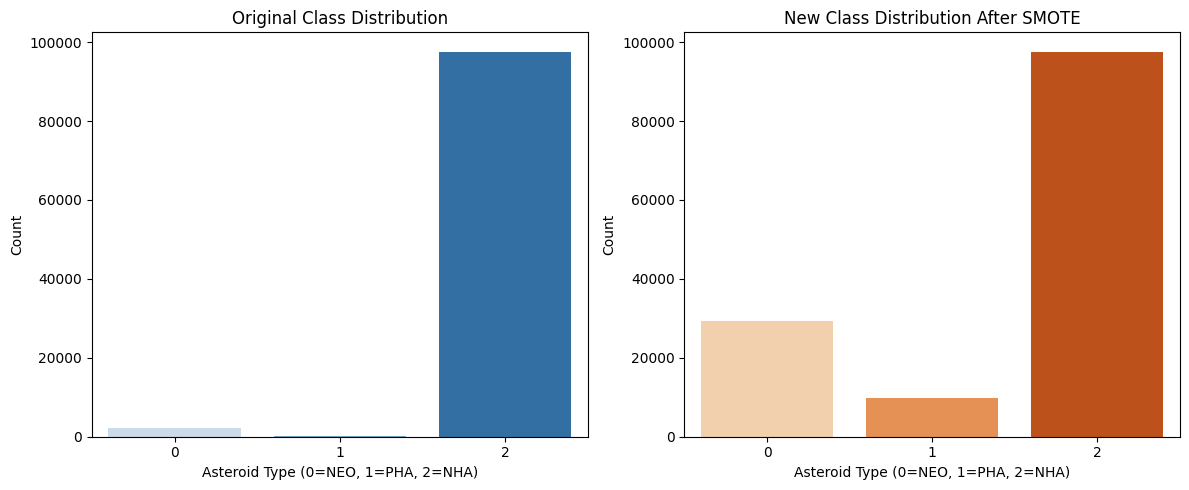

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE

# 1. Separate numeric and non-numeric features
numeric_features = df.select_dtypes(include=['number']).columns
non_numeric_features = df.select_dtypes(exclude=['number']).columns

X_numeric = df[numeric_features].drop(columns=['Asteroid_Type'])  # Numeric features for SMOTE
X_non_numeric = df[non_numeric_features]  # Non-numeric features to be kept
y = df["Asteroid_Type"]  # Target variable

# 2. Print original class distribution
original_counts = Counter(y)
print("Original Class Distribution:", original_counts)

# 3. Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Fill missing values with mean
X_numeric_imputed = imputer.fit_transform(X_numeric)

# 4. Apply SMOTE with controlled oversampling (30% NEOs, 10% PHAs)
nh_count = original_counts[2]  # NHA count (majority class)
neo_target = int(nh_count * 0.3)  # NEOs will be 30% of NHAs
pha_target = int(nh_count * 0.1)  # PHAs will be 10% of NHAs

smote = SMOTE(sampling_strategy={0: max(original_counts[0], neo_target),
                                 1: max(original_counts[1], pha_target)},
              random_state=42)

X_numeric_resampled, y_resampled = smote.fit_resample(X_numeric_imputed, y)

# 5. Create DataFrame for resampled numeric features
df_numeric_resampled = pd.DataFrame(X_numeric_resampled, columns=X_numeric.columns)
df_numeric_resampled['Asteroid_Type'] = y_resampled

# 6. Match non-numeric features with resampled data (without excessive duplication)
df_non_numeric_resampled = X_non_numeric.sample(n=len(df_numeric_resampled), replace=True, random_state=42).reset_index(drop=True)

# 7. Concatenate numeric and non-numeric features
df_resampled = pd.concat([df_numeric_resampled, df_non_numeric_resampled], axis=1)

# 8. Print new class distribution
new_counts = Counter(y_resampled)
print("New Class Distribution:", new_counts)

# 9. Plot bar chart for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution plot
sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()), ax=ax[0], palette="Blues")
ax[0].set_title("Original Class Distribution")
ax[0].set_xlabel("Asteroid Type (0=NEO, 1=PHA, 2=NHA)")
ax[0].set_ylabel("Count")

# New distribution plot
sns.barplot(x=list(new_counts.keys()), y=list(new_counts.values()), ax=ax[1], palette="Oranges")
ax[1].set_title("New Class Distribution After SMOTE")
ax[1].set_xlabel("Asteroid Type (0=NEO, 1=PHA, 2=NHA)")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show


After applying the smote the imabalnce has been removed now we can train our model on it


In [ ]:
# Calculate MOID to Semi-Major Axis Ratio
df_resampled['MOID to SMA Ratio'] = df_resampled['moid'] / df['a']
df_resampled['MOID to SMA Ratio']

,MOID to SMA Ratio
0,0.426653
1,0.377512
2,0.521051
3,0.508223
4,0.463603
...,...
136656,NaN
136657,NaN
136658,NaN
136659,NaN


Here we are preparing a KNN model which can classify the asteroids very easily

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Step 1: Select only numeric features for simplicity
features = ['moid', 'a', 'H', 'diameter', 'albedo', 'e', 'q', 'i']  # add more if needed
X = df_resampled[features]
y = df_resampled["Asteroid_Type"]

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Step 5: Evaluation
print("--- KNN Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['NEO (0)', 'PHA (1)', 'NHA (2)']))


--- KNN Classification Report ---
              precision    recall  f1-score   support

     NEO (0)       0.96      0.94      0.95      5782
     PHA (1)       0.84      0.92      0.88      1925
     NHA (2)       1.00      1.00      1.00     19626

    accuracy                           0.98     27333
   macro avg       0.94      0.95      0.94     27333
weighted avg       0.98      0.98      0.98     27333



Now we would train SVM model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("--- SVM Classification Report ---")
print(classification_report(y_test, y_pred_svm, target_names=['NEO (0)', 'PHA (1)', 'NHA (2)']))

--- SVM Classification Report ---
              precision    recall  f1-score   support

     NEO (0)       0.98      0.95      0.97      5782
     PHA (1)       0.87      0.97      0.92      1925
     NHA (2)       1.00      1.00      1.00     19626

    accuracy                           0.99     27333
   macro avg       0.95      0.97      0.96     27333
weighted avg       0.99      0.99      0.99     27333



Now we would train Random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # no scaling needed
y_pred_rf = rf.predict(X_test)

print("--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf, target_names=['NEO (0)', 'PHA (1)', 'NHA (2)']))

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

     NEO (0)       1.00      1.00      1.00      5782
     PHA (1)       0.99      1.00      1.00      1925
     NHA (2)       1.00      1.00      1.00     19626

    accuracy                           1.00     27333
   macro avg       1.00      1.00      1.00     27333
weighted avg       1.00      1.00      1.00     27333



Now we would train XG boost model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train on scaled or unscaled — XGBoost can handle both, but unscaled is fine here
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Classification Report
print("--- XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_xgb, target_names=['NEO (0)', 'PHA (1)', 'NHA (2)']))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:48:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost Classification Report ---
              precision    recall  f1-score   support

     NEO (0)       1.00      1.00      1.00      5782
     PHA (1)       1.00      1.00      1.00      1925
     NHA (2)       1.00      1.00      1.00     19626

    accuracy                           1.00     27333
   macro avg       1.00      1.00      1.00     27333
weighted avg       1.00      1.00      1.00     27333



In [ ]:
!pip install xgboost


After the above trained models we can definetly say that the best classifier is XGBoost model